In [4]:
!pip install pandas natasha pymystem3 ipymarkup nltk matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.9.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 505.7 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 6.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 9.2 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 9.8 MB/s eta 0:00:00:00:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 9.8 MB/s eta 0

In [5]:
import pandas as pd
import pymystem3
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from natasha import (
    Segmenter,
    MorphVocab,

    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,

    PER,
    NamesExtractor,

    Doc
)
from ipymarkup import show_dep_ascii_markup as show_markup
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## Работа с данными

Спаршенный сайт: [Lenta.ru](https://lenta.ru/)

Парсер: PR_NLP1-parser.py

In [6]:
# Загружаем данные
df = pd.read_csv('articles.csv', sep='\t')

# Удаляем лишние столбцы
morph_df = df.drop(["Unnamed: 0", "created_date"], axis=1)
morph_df

,title,content,category
0,В России повысили зарплаты,В России повышен минимальный размер оплаты тру...,Экономика
1,Партия Порошенко потребовала запретить поставк...,Партия бывшего президента Украины Петра Пороше...,Бывший СССР
2,В России подорожали алкогольные напитки и сига...,В России подорожали алкогольные напитки и сига...,Экономика
3,Рогозин назвал поклонников Маска «Свидетелями ...,Генеральный директор «Роскосмоса» Дмитрий Рого...,Наука и техника
4,В России изменились правила регистрации новых ...,В России начали действовать измененные правила...,Россия
...,...,...,...
14995,Агутин поделился секретами семейного счастья с...,Певец Леонид Агутин рассказал о секретах счаст...,Культура
14996,Появилось видео обрушения трибуны в израильско...,В сети появилось видео обрушения трибуны синаг...,Мир
14997,Имитирующие корсет джинсы вызвали недоумение у...,Необычный дизайн новой вещи популярного бренда...,Ценности
14998,На берегах священной реки в Индии обнаружили с...,"Власти Индии обнаружили сотни тел, захороненны...",Мир


# Анализ данных

## Токенизация и лемматизация слов

### Токенизация

In [7]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)

#Хранилище токенов к каждому предложению
sent_tokens = []

for article in morph_df['content']:
    doc = Doc(article)
    doc.segment(segmenter)
    doc.parse_syntax(syntax_parser)
    doc.tag_morph(morph_tagger)
    for sentence in doc.sents: # получаем предложения
        # При принте синтаксиса вылетает ошибка "max() iterable argument is empty"
        #sentence.syntax.print()
        sent_tokens.append([])
        for token in sentence.tokens: # получаем токены
            #print(token)
            sent_tokens[-1].append(token)



### Лемматизация

In [8]:
mystem=pymystem3.Mystem()

Installing mystem to /home/tengu/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [9]:

lemma = []

for x in range(len(sent_tokens)):
    lemma.append([])
    for y in range(len(sent_tokens[x])):
        lemma[-1].append(mystem.lemmatize(sent_tokens[x][y].text))

In [10]:
lemma[0]

[['в', '\n'],
 ['россия', '\n'],
 ['повышать', '\n'],
 ['минимальный', '\n'],
 ['размер', '\n'],
 ['оплата', '\n'],
 ['труд', '\n'],
 ['(\n'],
 ['мрот', '\n'],
 [')\n'],
 ['.', '\n']]

## Наиболее встречающиеся пары подлежащих и сказуемых

In [21]:
#Составляем датафрейм с парами
words_pairs = []
for sentance in sent_tokens:
    words_pairs.append([None, None])
    for word in sentance:
        word_role = -1
        match word.rel:
            case 'nsubj':
                word_role = 0
            case 'root':
                word_role = 1
            case _:
                pass
        if word_role > -1:
            if words_pairs[-1][word_role] != None:
                    words_pairs.append([None, None])
            words_pairs[-1][word_role] = mystem.lemmatize(word.text)[0]


words_dict = {
    'pair': [],
    'popularity': []
}

for pair in words_pairs:
  if pair[0] != None:
    if pair[1] != None:
       cur_pair = pair[0]+"_"+pair[1]
       #words_dict['pair'].append(pair[0]+"_"+pair[1])
       if cur_pair not in words_dict['pair']:
          words_dict['pair'].append(cur_pair)
          words_dict['popularity'].append(1)
       else:
          words_dict['popularity'][words_dict['pair'].index(cur_pair)] += 1

words_df = pd.DataFrame(words_dict)

words_df

,pair,popularity
0,президент_подписывать,74
1,повышение_составлять,2
2,мрот_составлять,2
3,размер_устанавливаться,1
4,порядок_действовать,1
...,...,...
69938,пассажир_выхватывать,1
69939,он_спровоцировать,1
69940,автобус_передавать,1
69941,мужчина_взять,1


In [22]:
words_df.sort_values(by=['popularity'], ascending=False)

,pair,popularity
3714,это_нужно,1074
131,риа_сообщать,802
563,он_отмечать,759
2856,это_позволять,583
303,он_рассказывать,573
...,...,...
30979,отказ_называться,1
30980,вертолет_провожать,1
30981,ми_привлекать,1
30982,вертолет_осуществлять,1


In [23]:
#Выводим топ 10 самых популярным парам
stat_df = words_df.sort_values(by=['popularity'], ascending=False).head(10)
stat_df

,pair,popularity
3714,это_нужно,1074
131,риа_сообщать,802
563,он_отмечать,759
2856,это_позволять,583
303,он_рассказывать,573
2781,вы_мочь,542
18,он_добавлять,536
8791,коронавирус_мочь,521
14482,это_стараться,519
14491,микроб_мочь,517


Исходя из топа по данным с новостного сайта можно сделать вывод о большом количестве использования новостей с "РИА Новости". Также, содержиться множество новостей со времен пандемии короновируса.

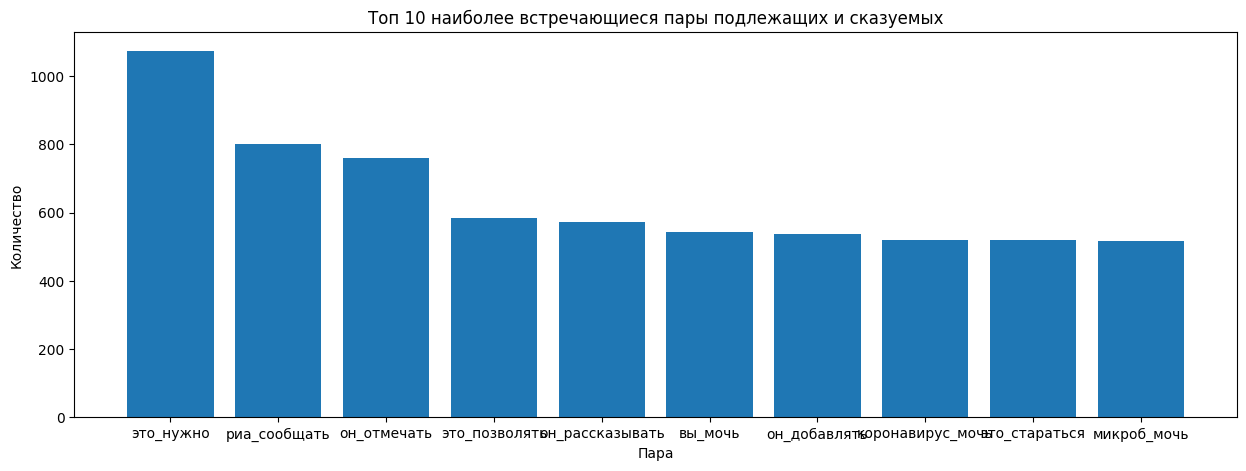

In [29]:
#Гистограмма

plt.figure(figsize=(15, 5))
plt.bar(stat_df['pair'], stat_df['popularity'])
#sns.histplot(stat_df['popularity'], bins=6, edgecolor='black')
plt.title('Топ 10 наиболее встречающиеся пары подлежащих и сказуемых')
plt.xlabel('Пара')
plt.ylabel('Количество')
plt.show()

### Популярные слова

In [11]:
#Чистим датасет от ненужных данных

nltk.download(['averaged_perceptron_tagger_ru', 'stopwords', 'punkt'])

STOP_LIST = nltk.corpus.stopwords.words('russian')

punkt_list = [".", ",", "!", "?", "...", ":", ";"]

for simb in punkt_list:
  STOP_LIST.append(simb)

lemma_words = {
    'word' : []
}

for sent in lemma:
  for word in sent:
    if word[0] not in STOP_LIST:
      #убираем числа
      try:
        if isinstance(int(word[0]), int):
          pass
      except ValueError:
          lemma_words['word'].append(word[0])

lemma_df = pd.DataFrame(lemma_words)

lemma_df

[nltk_data] Downloading package averaged_perceptron_tagger_ru to
[nltk_data]     /home/tengu/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data] Downloading package stopwords to /home/tengu/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/tengu/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,word
0,россия
1,повышать
2,минимальный
3,размер
4,оплата
...,...
2333375,вернуться
2333376,место
2333377,авария
2333378,взять


In [17]:
# Высчитываем популярные слова
vectorizer = TfidfVectorizer()
# Беру первые 100к, т.к. все ~2.5 ляма слов просто не помещаются в оперативу
X = vectorizer.fit_transform(lemma_df['word'].head(100000))

word_pop_count = pd.DataFrame(X.toarray()).sum(axis = 0)


df_pop_words = pd.DataFrame({'word': vectorizer.get_feature_names_out(),
                            'popularity': word_pop_count})

#Топ 10 популярных слов
pw = df_pop_words.sort_values(by=['popularity'], ascending=False).head(10)
pw

,word,popularity
11853,это,1101.0
2626,год,1066.0
4719,который,665.0
10247,сша,636.0
11924,январь,613.0
9125,россия,527.0
9808,сообщать,502.0
10301,также,461.0
9346,свой,381.0
3742,заявлять,380.0


Исходя из топа, можно сделать вывод по данным с новостного сайта, что в новостном пространстве сильно выражены взаимоотношения между Россией и США (большое количество слов в новостях "Россия" и "США"). Также, множество новостей пришлось на январь (большое кол-во слов "январь").

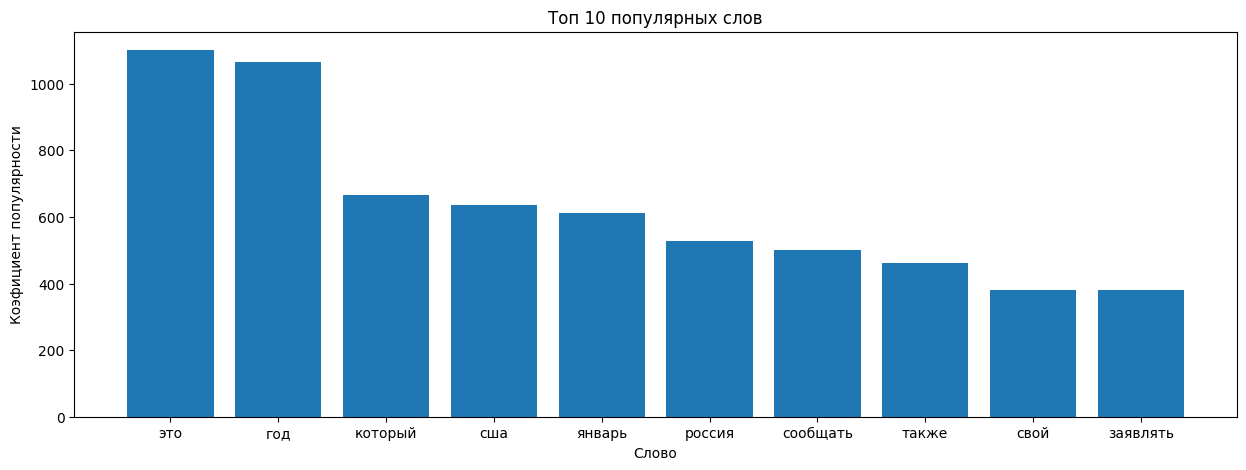

In [19]:
#Гистограмма

plt.figure(figsize=(15, 5))
plt.bar(pw['word'], pw['popularity'])
#sns.histplot(stat_df['popularity'], bins=6, edgecolor='black')
plt.title('Топ 10 популярных слов')
plt.xlabel('Слово')
plt.ylabel('Коэфициент популярности')
plt.show()